In [164]:
# import python libraries

%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [165]:
# Load data
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))


((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [166]:
# create a list of classes from y_train
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = y_train[:5]
num_classes

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [167]:
y_train = y_train.reshape(-1,)    # We dont need it in 2D so we convert to 1D (We need 1st dimension so we use -1 and to flatten it we leave empty)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [168]:
# print random images
def cifar_imgs(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

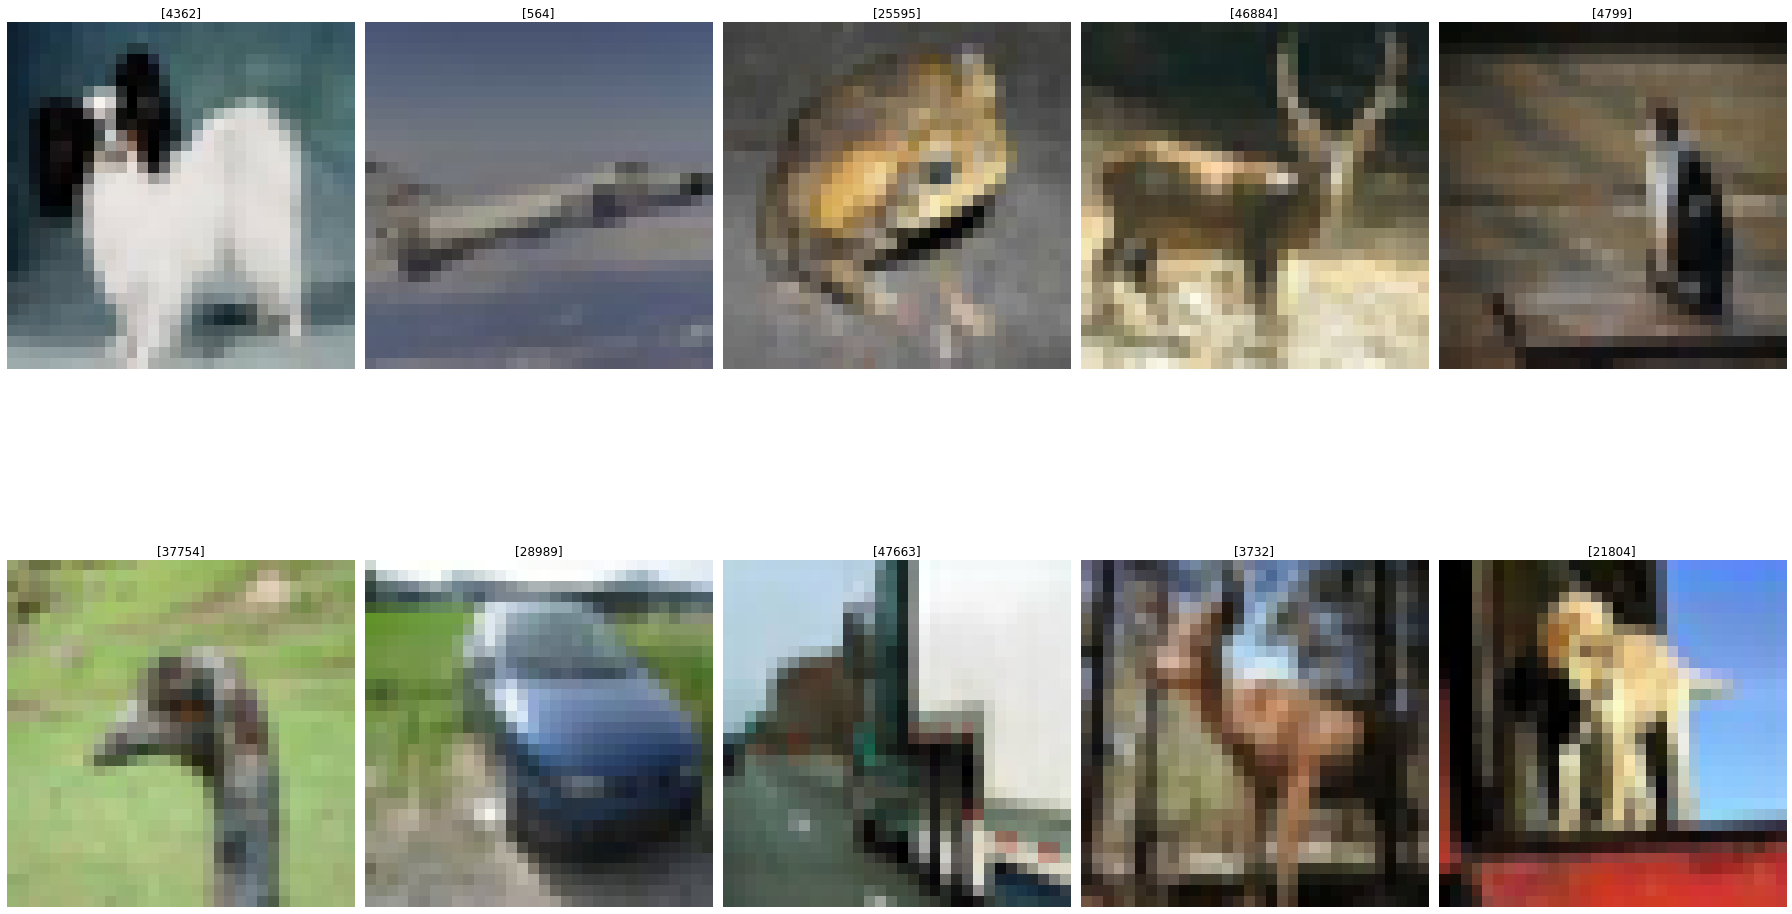

In [278]:
fig,axes = plt.subplots(2, 5, figsize=(25,25))  
axes=axes.reshape(-1)

for i in np.arange(0,2*5):   
    index=np.random.randint(0,len(X_train)) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title([index]) #Prints labels on top of the picture
    axes[i].axis('off')
    plt.tight_layout()


In [170]:
cifar_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [171]:
y_test = y_test.reshape(-1,)


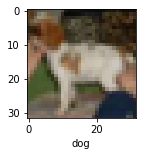

In [172]:
cifar_imgs(X_test, y_test, 12)

In [173]:
X_train[0]   # As the data is not normalized we have to narmalize it

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [174]:
# convert the data  to integer

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the Data 

X_train = X_train / 255.0
X_test = X_test / 255.0

In [175]:
X_train[0]    # Data is normalized

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [233]:
# Creating CNN model
# We are using 2 layers Convolution (Detecting the feature) 
# filter = detects different feature
# kerneal size = we use 3*3 filter (matrix/ box)
# Relu it give o/p 0 to 1 and impart non linearity. Ctivation fn gives o/p of the node to given input.
# Adam gives good accuracy
#
cnn_model = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 64)              

In [241]:
# complile the  CNN model
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [242]:
# train model for 10 epoches
cnn_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5211 - accuracy: 0.4510
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1661 - accuracy: 0.5897
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0326 - accuracy: 0.6409
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9533 - accuracy: 0.6695
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8876 - accuracy: 0.6921
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8346 - accuracy: 0.7118
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7912 - accuracy: 0.7264
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7526 - accuracy: 0.7394
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7205 - accuracy: 0.7497
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [243]:
#check accuracy
scores = cnn_model.evaluate(X_test, y_test, verbose = 1)
print('Accuracy : ', scores[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.8974 - accuracy: 0.6948
Accuracy :  0.6948000192642212


In [268]:
# predict on test data
y_pred = loaded_model.predict(X_test)
y_actual = [np.argmax(item) for item in y_pred]

'frog'

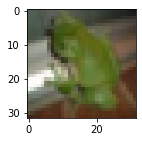

In [279]:
cifar_imgs(X_test, y_test, 7) 
classes[y_actual[7]]

# Improved CNN Model

In [197]:
# import all the libraries

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [198]:
# create a learning rate scheduler which will change the learning rate during the training
def lr_changer(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:    
        lrate = 0.0003        
    return lrate

In [199]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# store the orifinal image before preprocessing

from keras.datasets import cifar10  
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#standardize the data
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

# number of classes
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [201]:
# build a sequential model
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                    

In [202]:
# use image augmentation using ImageDataGenerator class
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
data_gen.fit(X_train)


In [206]:
batch_size = 64

# compile and run the model

rms_opt = tf.keras.optimizers.RMSprop(learning_rate =0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit(data_gen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch = X_train.shape[0] // batch_size,epochs=100,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_changer)])



Epoch 1/100
781/781 [==============================] - 137s 174ms/step - loss: 1.1349 - accuracy: 0.6374 - val_loss: 1.1449 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 2/100
781/781 [==============================] - 139s 178ms/step - loss: 1.0177 - accuracy: 0.6770 - val_loss: 0.8919 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 3/100
781/781 [==============================] - 132s 169ms/step - loss: 0.9319 - accuracy: 0.7054 - val_loss: 0.9456 - val_accuracy: 0.7181 - lr: 0.0010
Epoch 4/100
781/781 [==============================] - 135s 173ms/step - loss: 0.8847 - accuracy: 0.7280 - val_loss: 0.8820 - val_accuracy: 0.7433 - lr: 0.0010
Epoch 5/100
781/781 [==============================] - 134s 171ms/step - loss: 0.8405 - accuracy: 0.7432 - val_loss: 0.7529 - val_accuracy: 0.7790 - lr: 0.0010
Epoch 6/100
781/781 [==============================] - 131s 168ms/step - loss: 0.8109 - accuracy: 0.7561 - val_loss: 0.7475 - val_accuracy: 0.7914 - lr: 0.0010
Epoch 7/100
781/781 [===================

Epoch 52/100
781/781 [==============================] - 131s 168ms/step - loss: 0.5919 - accuracy: 0.8492 - val_loss: 0.6068 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 53/100
781/781 [==============================] - 134s 172ms/step - loss: 0.5894 - accuracy: 0.8498 - val_loss: 0.6813 - val_accuracy: 0.8266 - lr: 0.0010
Epoch 54/100
781/781 [==============================] - 136s 174ms/step - loss: 0.5844 - accuracy: 0.8506 - val_loss: 0.6032 - val_accuracy: 0.8536 - lr: 0.0010
Epoch 55/100
781/781 [==============================] - 135s 173ms/step - loss: 0.5888 - accuracy: 0.8479 - val_loss: 0.7083 - val_accuracy: 0.8194 - lr: 0.0010
Epoch 56/100
781/781 [==============================] - 134s 171ms/step - loss: 0.5887 - accuracy: 0.8492 - val_loss: 0.6124 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 57/100
781/781 [==============================] - 135s 173ms/step - loss: 0.5833 - accuracy: 0.8515 - val_loss: 0.5947 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 58/100
781/781 [============

In [227]:
scores_improved = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

# score has improves to 86z%

79/79 [==============================] - 5s 67ms/step - loss: 0.5539 - accuracy: 0.8622


In [229]:
# predict the label and compare it with actual label

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_dict = dict({0:'airplane', 1:'automobile', 2:'bird', 3:'cat',4: 'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'})


img_index = 6
n = np.array(x_test[img_index])
p = n.reshape(1, 32, 32, 3)
predict_class = classes[model.predict(p).argmax()]

print("Predicted Label:",predict_class)

print("Actual Label:", class_dict.get(int(y_test1[img_index])))

Predicted Label: automobile
Actual Label: automobile


<class 'PIL.Image.Image'>


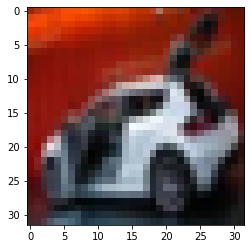

In [230]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# print image 
img_pil = array_to_img(n)
print(type(img_pil))

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(img_pil)

In [ ]:
# Code References
#https://www.youtube.com/watch?v=7HPwo4wnJeA
#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/